# Equity Analysis with Python - Introduction (Part 1)

__Please install yfinance__ with the following command (Anaconda Prompt/Terminal Window):

pip install yfinance

## yfinance API - first steps

In [176]:
%config IPCompleter.greedy=True

In [177]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [178]:
symbol = "AAPL" # ticker symbol for Apple Inc.

In [179]:
df = yf.download(tickers = symbol, interval = "1d")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900


In [180]:
df.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2025-01-15', '2025-01-16', '2025-01-17', '2025-01-21',
               '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-27',
               '2025-01-28', '2025-01-29'],
              dtype='datetime64[ns]', name='Date', length=11123, freq=None)

In [181]:
df.index = pd.to_datetime(df.index.date)
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900
2025-01-27,229.860001,232.149994,223.979996,224.020004,94863400


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11123 entries, 1980-12-12 to 2025-01-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11123 non-null  float64
 1   (High, AAPL)    11123 non-null  float64
 2   (Low, AAPL)     11123 non-null  float64
 3   (Open, AAPL)    11123 non-null  float64
 4   (Volume, AAPL)  11123 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 521.4 KB


- __Date__: Date (year-month-day) at midnight New York Time (business daily data without weekends and bank holidays)
- __Open__: daily Open Price @ 9:30 am Eastern TimeZone
- __High__: daily high/max price
- __Low__: daily low/min price
- __Close__: daily Close Price @ 4:00 pm Eastern TimeZone
- __Adj Close__: Close price adjusted for Dividend Payments (backward adjusted)
- __Volume__: daily Trading Volume (number of Shares)

__Price Chart__

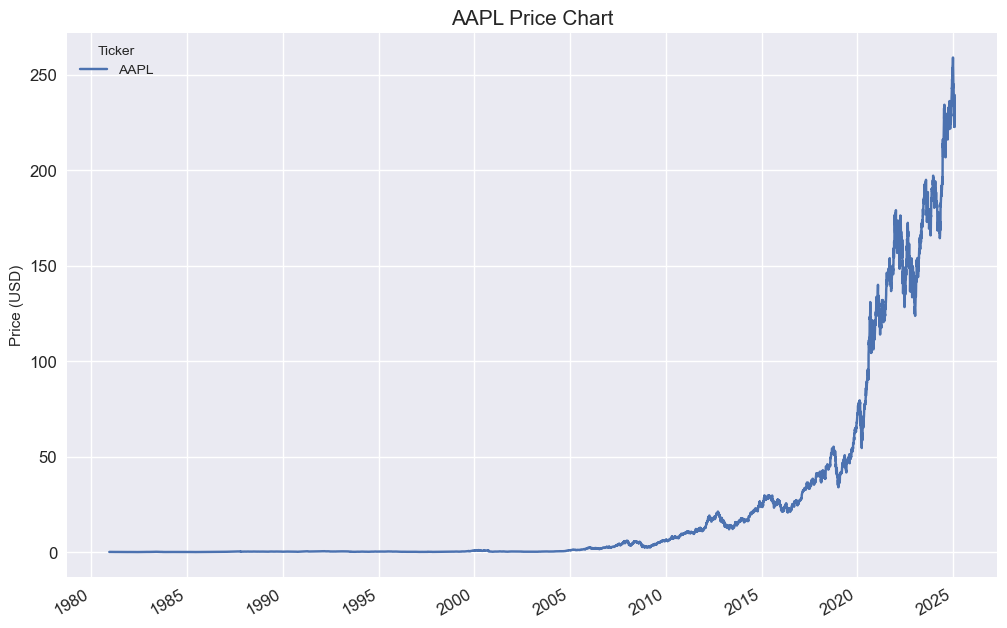

In [183]:
df.Close.plot(figsize = (12, 8), fontsize = 12)
plt.ylabel("Price (USD)")
plt.title("AAPL Price Chart", fontsize = 15)
plt.show()

__Volume Chart__

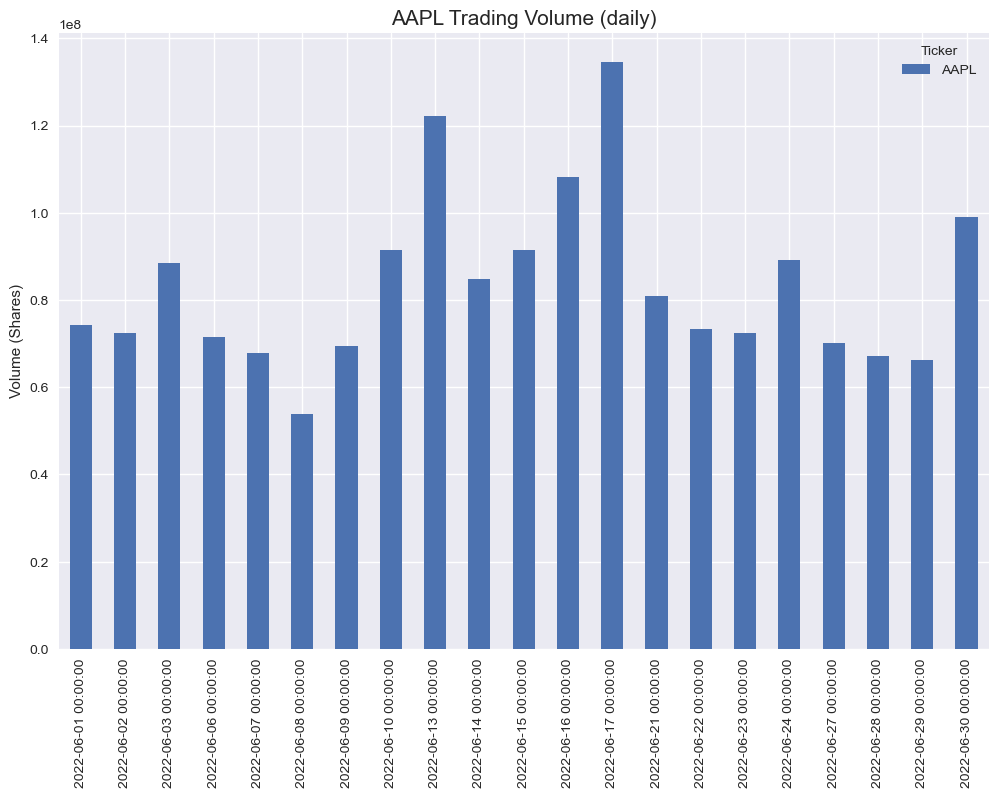

In [184]:
df.loc["2022-6", "Volume"].plot(figsize = (12, 8), kind = "bar")
plt.ylabel("Volume (Shares)")
plt.title("AAPL Trading Volume (daily)", fontsize = 15)
plt.show()

In [185]:
df.Volume.mul(df.Close) # Trading Volume (USD Value)

Ticker,AAPL
1980-12-12,4.635668e+07
1980-12-15,1.647657e+07
1980-12-16,9.177447e+06
1980-12-17,7.689054e+06
1980-12-18,6.722825e+06
...,...
2025-01-23,1.347212e+10
2025-01-24,1.218560e+10
2025-01-27,2.180530e+10
2025-01-28,1.803809e+10


## Excursus: Versions and Updates

Note: From yfinance version 0.2.48, loading one symbol with yf.download() will lead to a Multi Level Index.
To avoid this, set multi_level_index=False

In [186]:
yf.download(tickers = symbol) # creates a Multi Level Index (from yfinance 0.2.48)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900


In [187]:
df = yf.download(tickers = symbol, interval="1d", multi_level_index=False) # avoids Multi Level Index (from yfinance 0.2.48)
df.index = pd.to_datetime(df.index.date)

[*********************100%***********************]  1 of 1 completed


You can get the __latest version__ of yfinance with the following command (Anaconda Prompt/Terminal Window):

pip install yfinance --upgrade

In [188]:
yf.__version__

'0.2.52'

In [189]:
df.index

DatetimeIndex(['1980-12-12', '1980-12-15', '1980-12-16', '1980-12-17',
               '1980-12-18', '1980-12-19', '1980-12-22', '1980-12-23',
               '1980-12-24', '1980-12-26',
               ...
               '2025-01-15', '2025-01-16', '2025-01-17', '2025-01-21',
               '2025-01-22', '2025-01-23', '2025-01-24', '2025-01-27',
               '2025-01-28', '2025-01-29'],
              dtype='datetime64[ns]', length=11123, freq=None)

## Analysis Period

In [190]:
df

,Close,High,Low,Open,Volume
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900
2025-01-27,229.860001,232.149994,223.979996,224.020004,94863400
2025-01-28,238.259995,240.190002,230.809998,230.850006,75707600


In [191]:
df.loc["2022-01-01":"2022-01-15"]

,Close,High,Low,Open,Volume
2022-01-03,179.076599,179.932588,174.845913,174.963974,104487900
2022-01-04,176.803833,179.991620,176.233179,179.686619,99310400
2022-01-05,172.100861,177.266248,171.825374,176.715276,94537600
2022-01-06,169.227905,172.474723,168.873707,169.916620,96904000
2022-01-07,169.395187,171.333439,168.273561,170.103585,86709100
2022-01-10,169.414841,169.719842,165.459626,166.354964,106765600
2022-01-11,172.258286,172.356665,168.066948,169.542773,76138300
2022-01-12,172.701035,174.324436,172.002486,173.281522,74805200
2022-01-13,169.414841,173.773436,169.021278,172.946978,84505800
2022-01-14,170.280685,170.979234,168.332586,168.578557,80440800


In [192]:
df.loc["2022"]

,Close,High,Low,Open,Volume
2022-01-03,179.076599,179.932588,174.845913,174.963974,104487900
2022-01-04,176.803833,179.991620,176.233179,179.686619,99310400
2022-01-05,172.100861,177.266248,171.825374,176.715276,94537600
2022-01-06,169.227905,172.474723,168.873707,169.916620,96904000
2022-01-07,169.395187,171.333439,168.273561,170.103585,86709100
...,...,...,...,...,...
2022-12-23,130.487808,131.041978,128.290909,129.557588,63814900
2022-12-27,128.676849,130.042493,127.380484,130.012807,69007800
2022-12-28,124.728363,129.666432,124.560134,128.320585,85438400
2022-12-29,128.261185,129.122126,126.400752,126.658041,75703700


In [193]:
df.loc["2017":]

,Close,High,Low,Open,Volume
2017-01-03,26.891960,26.933635,26.570137,26.810926,115127600
2017-01-04,26.861856,26.975306,26.799345,26.822497,84472400
2017-01-05,26.998465,27.056347,26.813242,26.838710,88774400
2017-01-06,27.299450,27.357332,26.966049,27.037822,127007600
2017-01-09,27.549496,27.651369,27.306393,27.308707,134247600
...,...,...,...,...,...
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900
2025-01-27,229.860001,232.149994,223.979996,224.020004,94863400
2025-01-28,238.259995,240.190002,230.809998,230.850006,75707600


In [194]:
df.loc[:, ["Close", "Volume"]]

,Close,Volume
1980-12-12,0.098834,469033600
1980-12-15,0.093678,175884800
1980-12-16,0.086802,105728000
1980-12-17,0.088951,86441600
1980-12-18,0.091530,73449600
...,...,...
2025-01-23,223.660004,60234800
2025-01-24,222.779999,54697900
2025-01-27,229.860001,94863400
2025-01-28,238.259995,75707600


In [195]:
df = yf.download(tickers = symbol, start = "2020-07-01", end = "2020-12-31")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-07-01,88.698448,89.490159,88.649732,88.944490,110737200
2020-07-02,88.698448,90.247770,88.583962,89.609530,114041600
2020-07-06,91.071159,91.541312,90.101615,90.133285,118655600
2020-07-07,90.788582,92.233149,90.676526,91.451184,112424400
2020-07-08,92.903076,92.934746,91.682620,91.770321,117092000
...,...,...,...,...,...
2020-12-23,128.059875,129.497308,127.883854,129.233298,88223700
2020-12-24,129.047516,130.504525,128.196787,128.411916,54930100


Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

In [196]:
df = yf.download(tickers = symbol, period = "1mo") # last 30 days
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-12-30,252.199997,253.500000,250.750000,252.229996,35557500
2024-12-31,250.419998,253.279999,249.429993,252.440002,39480700
2025-01-02,243.850006,249.100006,241.820007,248.929993,55740700
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000
2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900
2025-01-10,236.850006,240.160004,233.000000,240.009995,61710900


In [197]:
df = yf.download(tickers = symbol, period = "1y") # last 365 days 
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-01-30,187.123276,190.864955,186.556062,190.009147,55859400
2024-01-31,183.501022,186.187872,183.451278,186.128151,55467800
2024-02-01,185.949036,186.038593,182.923863,183.093032,64885400
2024-02-02,184.943954,186.416735,178.376125,178.983151,102518000
2024-02-05,186.765015,188.327368,184.933989,187.232725,69668800
...,...,...,...,...,...
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900


In [198]:
df = yf.download(tickers = symbol, period = "ytd") # year-to-date 
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-01-02,243.850006,249.100006,241.820007,248.929993,55740700
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000
2025-01-08,242.699997,243.710007,240.050003,241.919998,37628900
2025-01-10,236.850006,240.160004,233.000000,240.009995,61710900
2025-01-13,234.399994,234.669998,229.720001,233.529999,49630700
2025-01-14,233.279999,236.119995,232.470001,234.750000,39435300


In [199]:
df = yf.download(tickers = symbol, period = "max") # max
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900


## Data Frequency

Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo <br>
(Intraday data cannot extend last 60 days)

__daily (default)__

In [200]:
df = yf.download(tickers = symbol, interval = "1d")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900


__monthly__

In [201]:
df = yf.download(tickers = symbol, interval = "1mo")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1985-01-01,0.099694,0.106999,0.095827,0.100124,6366416000
1985-02-01,0.085084,0.105710,0.085084,0.099694,4733388800
1985-03-01,0.076059,0.089381,0.071333,0.085084,4615587200
1985-04-01,0.073052,0.079068,0.067466,0.076059,2868028800
1985-05-01,0.059731,0.076489,0.058012,0.073052,4639129600
...,...,...,...,...,...
2024-09-01,232.743942,232.833840,213.684909,228.298836,1232140300
2024-10-01,225.661728,237.229003,221.086760,229.267761,930736000


__weekly__

In [202]:
df = yf.download(tickers = symbol, interval = "1wk")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-08,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.097116,0.097545,0.086802,0.094108,490134400
1980-12-22,0.122039,0.122469,0.101842,0.101842,187891200
1980-12-29,0.118602,0.124188,0.117313,0.123758,219452800
1981-01-05,0.109577,0.116453,0.103992,0.116453,197904000
...,...,...,...,...,...
2024-12-30,243.360001,253.500000,241.820007,252.229996,171023000
2025-01-06,236.850006,247.330002,233.000000,244.309998,185241400


__intraday - 1h__

In [203]:
#df = yf.download(tickers = symbol, interval = "1h")
#df

In [204]:
df = yf.download(tickers = symbol, period = "1y", interval = "1h")
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2024-01-30 14:30:00+00:00,189.949997,191.800003,189.460007,190.940002,10879513
2024-01-30 15:30:00+00:00,188.653198,190.250000,187.865005,189.929993,12493978
2024-01-30 16:30:00+00:00,188.410004,188.940002,188.229996,188.654999,4796471
2024-01-30 17:30:00+00:00,188.563995,188.570007,187.679993,188.399994,4738358
2024-01-30 18:30:00+00:00,187.845001,188.639893,187.470001,188.559998,4840030
...,...,...,...,...,...
2025-01-29 16:30:00+00:00,236.869003,237.220001,236.130005,236.529999,4055486
2025-01-29 17:30:00+00:00,237.429993,237.434998,235.460007,236.869995,3400271


__intraday - 1m__

In [205]:
#df = yf.download(tickers = symbol, period = "1y", interval = "1m")
#df

In [206]:
# df = yf.download(tickers = symbol, period = "1wk", interval = "1m") # old (1wk deprecated) 
# df

In [207]:
df = yf.download(tickers = symbol, period = "5d", interval = "1m") # new (use 5d instead)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Datetime,,,,,
2025-01-23 14:30:00+00:00,225.060104,225.478806,224.500000,224.729996,2353399
2025-01-23 14:31:00+00:00,225.927094,226.059998,225.050003,225.069504,679264
2025-01-23 14:32:00+00:00,225.570007,226.259995,225.500107,225.899994,581942
2025-01-23 14:33:00+00:00,225.639999,225.779999,225.328506,225.551605,301623
2025-01-23 14:34:00+00:00,225.279907,225.669998,225.171005,225.669998,237530
...,...,...,...,...,...
2025-01-29 20:55:00+00:00,239.570404,239.580002,239.419998,239.509995,199746
2025-01-29 20:56:00+00:00,239.764999,239.789993,239.550003,239.589996,239557


<Axes: xlabel='Datetime'>

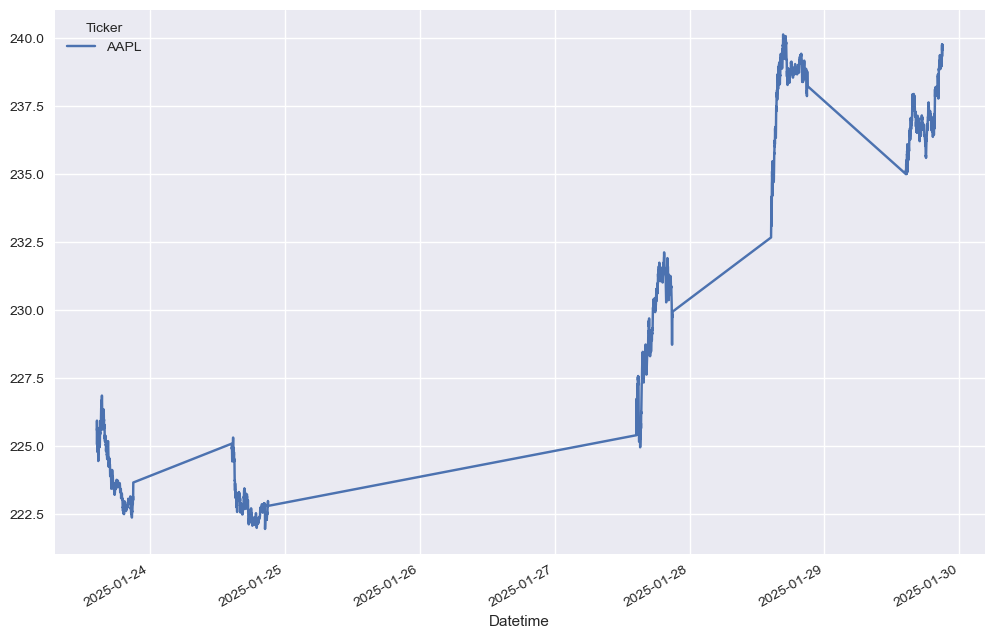

In [208]:
df.loc[:, "Close"].plot(figsize=(12,8))

## Dividends

__Dividend__: A dividend is a __distribution of profits__ by a corporation to its shareholders.

Companies are __free__ to distribute (all / parts / none) of their profits to shareholders (Dividend Payout Policy) 

Dividend Payouts are an import __source of income__ for equity investors.

__Total Return/Profit__ of stocks consists of:
- Stock Price Increase
- Dividend Payouts

- For __innovative & high-growth__ companies, __Stock Price Increase__ is relatively more important.
- For __mature & highly profitable__ companies, __Dividend Payouts__ can be a significant part of Total Return/Profit.

-> __Don´t omit Dividend Payouts__ in your Analysis / Performance Comparison! (otherwise, high-dividend stocks get penalized!)

In [209]:
yf.download(tickers = symbol, actions=True, period="5y")

[*********************100%***********************]  1 of 1 completed


Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,,
2020-01-30,78.496567,0.0,78.549889,77.255630,77.689476,0.0,126743200
2020-01-31,75.016136,0.0,78.208153,74.720444,77.784005,0.0,199588400
2020-02-03,74.810127,0.0,75.980774,73.249260,73.753387,0.0,173788400
2020-02-04,77.279877,0.0,77.471352,76.014702,76.421883,0.0,136616400
2020-02-05,77.910042,0.0,78.712288,77.304115,78.411743,0.0,118826800
...,...,...,...,...,...,...,...
2025-01-23,223.660004,0.0,227.029999,222.300003,224.740005,0.0,60234800
2025-01-24,222.779999,0.0,225.630005,221.410004,224.779999,0.0,54697900


In [210]:
pd.read_csv("aapl.csv")

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10550,2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
10551,2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
10552,2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0
10553,2022-10-20,143.020004,145.889999,142.649994,143.389999,143.389999,64522000,0.0,0.0


__For this and the next lectures, you have the choice between__
- option 1: working with the same data as in the videos (saved in the csv file aapl.csv) __RECOMMENDED!!!__
- option 2: working with your specific maximum time period

In [211]:
# option 1 -> same data as in video
df = pd.read_csv("aapl.csv", index_col = "Date", parse_dates = ["Date"]) # for more information, see lecture "Saving and Loading Data (Local Files)"  
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


In [212]:
# option 2 -> max period
# df = yf.download(tickers = symbol, actions = True) 
# df

In [213]:
df.loc[df.Dividends != 0]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1987-05-11,0.343750,0.354911,0.342634,0.343750,0.268340,197276800,0.000536,0.0
1987-08-10,0.430804,0.430804,0.408482,0.430804,0.336732,77996800,0.000536,0.0
1987-11-17,0.328125,0.330357,0.312500,0.312500,0.244794,268800000,0.000714,0.0
1988-02-12,0.362723,0.370536,0.361607,0.366071,0.287323,137760000,0.000714,0.0
1988-05-16,0.361607,0.369420,0.357143,0.368304,0.289648,74760000,0.000714,0.0
...,...,...,...,...,...,...,...,...
2021-08-06,146.350006,147.110001,145.630005,146.139999,145.325668,54126800,0.220000,0.0
2021-11-05,151.889999,152.199997,150.059998,151.279999,150.656570,65463900,0.220000,0.0
2022-02-04,171.679993,174.100006,170.679993,172.389999,171.898315,82465400,0.220000,0.0


In [214]:
df.Dividends.sum() # cumulative Dividends per share

6.603564

In [215]:
# df.Close[-1] - df.Close[0] # cumulative Stock Price Increase - OLD

In [216]:
df.Close.iloc[-1] - df.Close.iloc[0] # cumulative Stock Price Increase - NEW

147.1416562795639

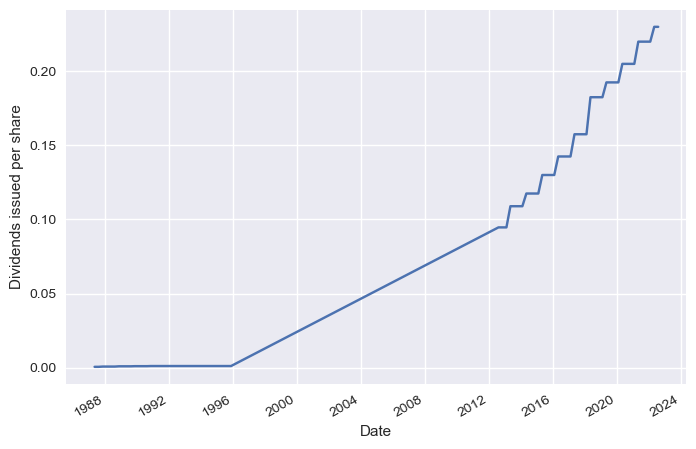

In [217]:
df.loc[df.Dividends != 0].Dividends.plot()
plt.ylabel('Dividends issued per share')
plt.show()

-> AAPL Dividend Policy: 
- historically __low-dividend__ stock (focus on growth) 
- Dividend Payouts __smoothed and steadily growing__ (highly predictable)
- __Avoiding Dividend Cuts__ in less profitable years (negative signal in the market)

## What´s the Adjusted Close Price?

"The Adjusted Close Price is the backward adjusted (reduced) Close Price (adjusted for Dividends)."   

In [218]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


In [219]:
df2 = df[["Close", "Adj Close", "Dividends"]].copy()
df2

,Close,Adj Close,Dividends
Date,,,
1980-12-12,0.128348,0.100039,0.0
1980-12-15,0.121652,0.094820,0.0
1980-12-16,0.112723,0.087861,0.0
1980-12-17,0.115513,0.090035,0.0
1980-12-18,0.118862,0.092646,0.0
...,...,...,...
2022-10-17,142.410004,142.410004,0.0
2022-10-18,143.750000,143.750000,0.0
2022-10-19,143.860001,143.860001,0.0


In [220]:
df3 = df2.loc[df2.Dividends!=0]
df3

,Close,Adj Close,Dividends
Date,,,
1987-05-11,0.343750,0.268340,0.000536
1987-08-10,0.430804,0.336732,0.000536
1987-11-17,0.312500,0.244794,0.000714
1988-02-12,0.366071,0.287323,0.000714
1988-05-16,0.368304,0.289648,0.000714
...,...,...,...
2021-08-06,146.139999,145.325668,0.220000
2021-11-05,151.279999,150.656570,0.220000
2022-02-04,172.389999,171.898315,0.220000


In [221]:
df3["Adj Close"].iloc[0]

0.268340140581131

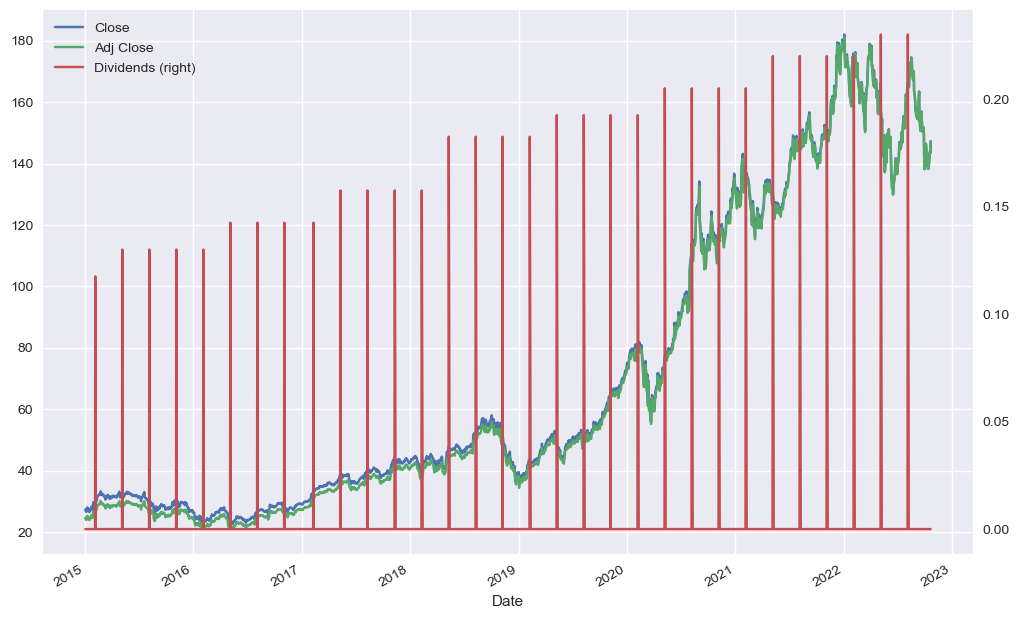

In [222]:
df2.loc["2015":].plot(figsize = (12, 8), secondary_y = "Dividends")
plt.show()

In [223]:
df2[df2.Dividends > 0]

,Close,Adj Close,Dividends
Date,,,
1987-05-11,0.343750,0.268340,0.000536
1987-08-10,0.430804,0.336732,0.000536
1987-11-17,0.312500,0.244794,0.000714
1988-02-12,0.366071,0.287323,0.000714
1988-05-16,0.368304,0.289648,0.000714
...,...,...,...
2021-08-06,146.139999,145.325668,0.220000
2021-11-05,151.279999,150.656570,0.220000
2022-02-04,172.389999,171.898315,0.220000


In [224]:
last_div = df2.loc["2022-08-01": "2022-08-5"].copy()
last_div

,Close,Adj Close,Dividends
Date,,,
2022-08-01,161.509995,161.285965,0.00
2022-08-02,160.009995,159.788040,0.00
2022-08-03,166.130005,165.899567,0.00
2022-08-04,165.809998,165.580002,0.00
2022-08-05,165.350006,165.350006,0.23


In [225]:
last_div.Close - last_div["Adj Close"]

Date
2022-08-01    0.224030
2022-08-02    0.221954
2022-08-03    0.230438
2022-08-04    0.229996
2022-08-05    0.000000
dtype: float64

https://in.help.yahoo.com/kb/adjusted-close-sln28256.html

In [226]:
multiplier = (1 - 0.23/165.809998)
multiplier

0.9986128701358528

In [227]:
last_div

,Close,Adj Close,Dividends
Date,,,
2022-08-01,161.509995,161.285965,0.00
2022-08-02,160.009995,159.788040,0.00
2022-08-03,166.130005,165.899567,0.00
2022-08-04,165.809998,165.580002,0.00
2022-08-05,165.350006,165.350006,0.23


In [228]:
last_div["Adj Close calc"] = last_div.Close * multiplier
last_div

,Close,Adj Close,Dividends,Adj Close calc
Date,,,,
2022-08-01,161.509995,161.285965,0.00,161.285959
2022-08-02,160.009995,159.788040,0.00,159.788040
2022-08-03,166.130005,165.899567,0.00,165.899561
2022-08-04,165.809998,165.580002,0.00,165.579998
2022-08-05,165.350006,165.350006,0.23,165.120644


In [229]:
df["Adj Close"] / df["Close"] # total multiplier (all dividends)

Date
1980-12-12    0.779439
1980-12-15    0.779440
1980-12-16    0.779439
1980-12-17    0.779440
1980-12-18    0.779439
                ...   
2022-10-17    1.000000
2022-10-18    1.000000
2022-10-19    1.000000
2022-10-20    1.000000
2022-10-21    1.000000
Length: 10555, dtype: float64

In [230]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


__Interpretations:__
- Borrowing parts (e.g. 22%) of initial stock purchase price in 1980 and pay back borrowed amounts with Dividends. -or-
- Reinvesting Dividends and buying more shares with Dividends

__Benefits:__
- good approximation for a Stock´s __Total Return__ (Price Return + Dividend Yield)
- allows __Performance Comparison__ across stocks with different Payout Policies

## Stock Splits

In [231]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,0.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,0.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,0.0


All Prices (OHLC, Adj Close) and Dividends are __backward adjusted__ (reduced) for Stock Splits. 

-> This __makes perfectly sense__ and you should not question it (unless you are interested in historical observable prices)!

In [232]:
splits = df.loc[df["Stock Splits"] > 0]
splits

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1987-06-16,0.370536,0.372768,0.339286,0.370536,0.289250,342720000,0.0,2.0
2000-06-21,0.901786,1.016741,0.898438,0.993304,0.848115,490000000,0.0,2.0
2005-02-28,1.595714,1.612143,1.570000,1.602143,1.367960,651610400,0.0,2.0
2014-06-09,23.174999,23.469999,22.937500,23.424999,20.925592,301660000,0.0,7.0
2020-08-31,127.580002,131.000000,126.000000,129.039993,127.500870,225702700,0.0,4.0


In [233]:
df.loc["2000-06", :]

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2000-06-01,0.729911,0.799665,0.717634,0.795759,0.679444,903840000,0.0,0.0
2000-06-02,0.837054,0.890625,0.794643,0.826451,0.705650,792848000,0.0,0.0
2000-06-05,0.833147,0.850446,0.800781,0.815290,0.696121,323668800,0.0,0.0
2000-06-06,0.821150,0.863839,0.806362,0.829241,0.708033,525481600,0.0,0.0
2000-06-07,0.835938,0.866071,0.818080,0.862165,0.736144,337019200,0.0,0.0
2000-06-08,0.871652,0.879464,0.831473,0.846540,0.722803,238526400,0.0,0.0
2000-06-09,0.863839,0.874442,0.842634,0.854911,0.729950,252358400,0.0,0.0
2000-06-12,0.860491,0.861049,0.811384,0.814174,0.695168,290337600,0.0,0.0
2000-06-13,0.814174,0.845424,0.787388,0.843750,0.720421,351456000,0.0,0.0


__Stock Split__: allows a company to break (split) each share into multiple shares __without affecting its market capitalization (total value of all its shares) or each investor's stake__ in the company. Motivation: reduce price per share and increase granularity.

__Example Stock Split 4:1__ -> Receive 4 new shares for 1 old share. Share Price immediately drops to 1/4 (no value effect)

On Yahoo Finance, Prices & Dividends are backward adjusted for Stock Splits. 

Price on 2020-08-31 __after Split__:

In [234]:
splits.loc["2020-08-31", "Close"] 

129.0399932861328

Price on 2020-08-31 __before Split__:

In [235]:
splits.loc["2020-08-31", "Close"] * splits.loc["2020-08-31", "Stock Splits"]

516.1599731445312

__-> 4 * 129 == 1 * 516__

In [236]:
splits.loc["2020-08-31", "Low"]

126.0

__Calculate the unadjusted (observable) prices__

In [237]:
df["Stock Splits"].replace(to_replace = 0, value = 1, inplace = True) # 1:1 on all other days
df

/var/folders/ql/639_js492lngtxxh_xl4npgc0000gn/T/ipykernel_78944/1162197168.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Stock Splits"].replace(to_replace = 0, value = 1, inplace = True) # 1:1 on all other days


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0
...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0


In [238]:
df.sort_index(ascending=False)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2022-10-21,142.869995,147.850006,142.649994,147.270004,147.270004,86464700,0.0,1.0
2022-10-20,143.020004,145.889999,142.649994,143.389999,143.389999,64522000,0.0,1.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0
...,...,...,...,...,...,...,...,...
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0


In [239]:
df["Multiplier"] = df.sort_index(ascending = False)["Stock Splits"].cumprod() # cumulative multipier
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier
Date,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0
...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0


In [240]:
df["Close_unadj"] = df["Close"] * df.Multiplier # observable close price
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier,Close_unadj
Date,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0,28.749950
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0,27.250048
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0,25.249952
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0,25.874911
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0,26.625089
...,...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0,142.410004
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0,143.750000
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0,143.860001


In [241]:
df

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Multiplier,Close_unadj
Date,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100039,469033600,0.0,1.0,224.0,28.749950
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094820,175884800,0.0,1.0,224.0,27.250048
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087861,105728000,0.0,1.0,224.0,25.249952
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090035,86441600,0.0,1.0,224.0,25.874911
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092646,73449600,0.0,1.0,224.0,26.625089
...,...,...,...,...,...,...,...,...,...,...
2022-10-17,141.070007,142.899994,140.270004,142.410004,142.410004,85250900,0.0,1.0,1.0,142.410004
2022-10-18,145.490005,146.699997,140.610001,143.750000,143.750000,99136600,0.0,1.0,1.0,143.750000
2022-10-19,141.690002,144.949997,141.500000,143.860001,143.860001,61758300,0.0,1.0,1.0,143.860001


__-> (backward adjusted) prices correctly reflect true price performance. They ignore price drops caused by stock splits!__

__unadjusted Dividends__

In [68]:
df["div_unadj"] = df["Dividends"] * df.Multiplier

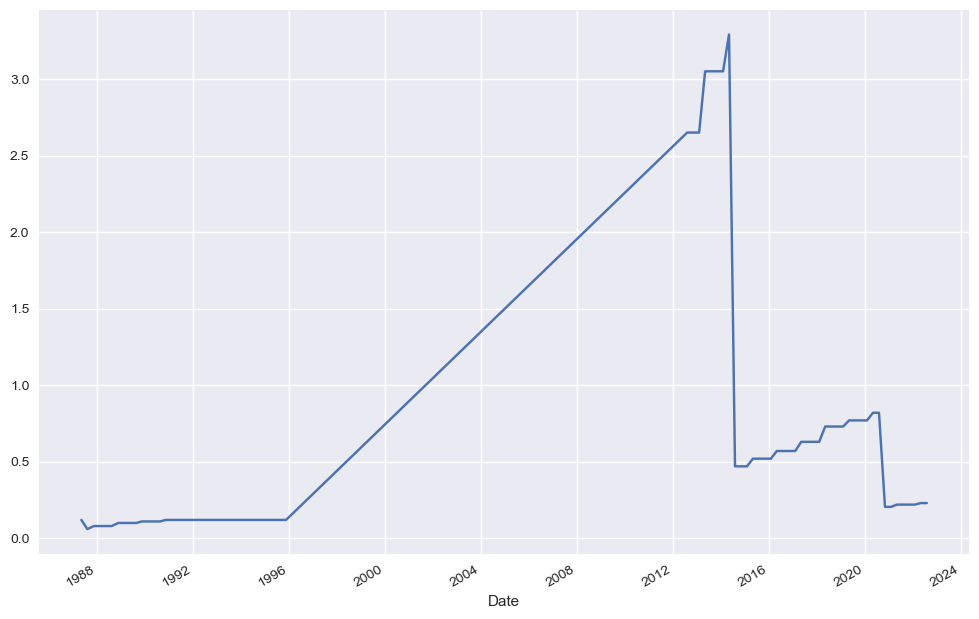

In [69]:
df.loc[df.div_unadj != 0].div_unadj.plot(figsize = (12, 8))
plt.show()

__unadjusted Trading Volume (number of shares)__

In [70]:
df["Volume_unadj"] = df["Volume"] / df.Multiplier

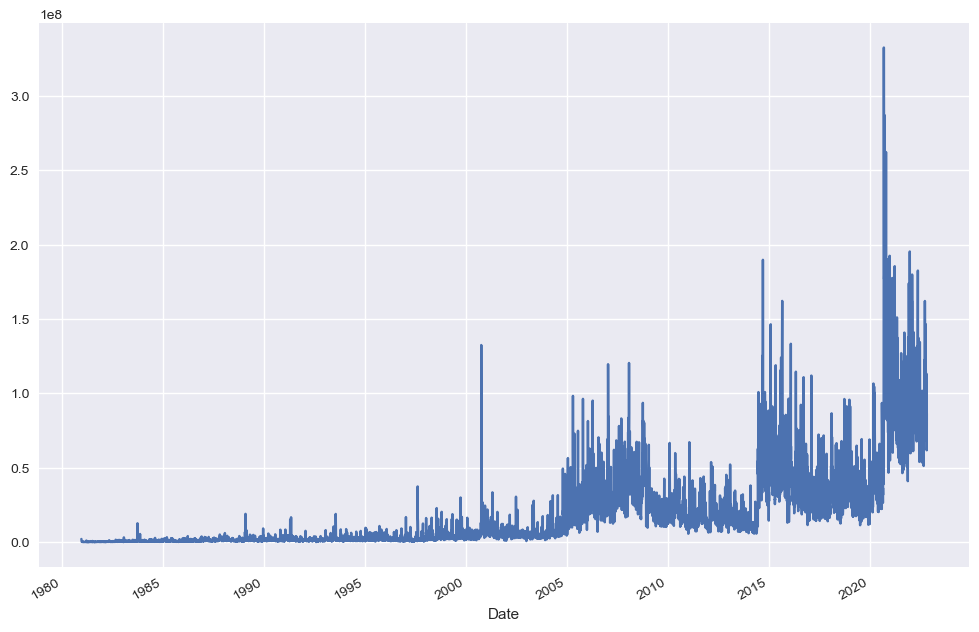

In [71]:
df["Volume_unadj"].plot(figsize = (12, 8))
plt.show()

## Stocks from other Countries / Exchanges 

In [72]:
yf.download(tickers = "AAPL") # US Ticker (no suffix)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-22,223.830002,224.119995,219.789993,219.789993,64126500
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800


In [73]:
#yf.download(tickers = "RELIANCE") # Indian Ticker (no suffix)

__Exchange List:__ 

https://help.yahoo.com/kb/SLN2310.html

In [74]:
yf.download(tickers = "RELIANCE.NS") # Indian Ticker

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
1996-01-01,3.724791,3.731127,3.686773,3.711213,104121369
1996-01-02,3.695826,3.733844,3.668671,3.715741,168743308
1996-01-03,3.723886,3.927550,3.715740,3.756472,209323879
1996-01-04,3.689489,3.700351,3.639705,3.688584,216900264
1996-01-05,3.664145,3.675007,3.632464,3.675007,166708467
...,...,...,...,...,...
2025-01-22,1277.099976,1282.900024,1268.699951,1278.300049,10273590
2025-01-23,1263.650024,1277.349976,1261.599976,1270.000000,8720682


In [75]:
yf.download(tickers = "LHA.DE") # German Ticker (Deutsche Boerse XETRA)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,LHA.DE,LHA.DE,LHA.DE,LHA.DE,LHA.DE
Date,,,,,
1996-12-16,4.093604,4.217714,4.055589,4.167679,1066584
1996-12-17,4.177701,4.181694,4.043569,4.073598,1052852
1996-12-18,4.149669,4.281765,4.129662,4.183691,1332249
1996-12-19,4.195710,4.219709,4.133655,4.133655,594524
1996-12-20,4.123633,4.243749,4.103627,4.193714,763507
...,...,...,...,...,...
2025-01-22,5.962000,5.990000,5.872000,5.980000,4153392
2025-01-23,6.048000,6.098000,5.934000,5.940000,7329850


In [76]:
yf.download(tickers = "LHA.F") # German Ticker (Frankfurt Stock Exchange)

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,LHA.F,LHA.F,LHA.F,LHA.F,LHA.F
Date,,,,,
2000-01-03,10.004571,10.697529,10.004571,10.437670,443367
2000-01-04,9.961260,10.134498,9.701401,10.004569,682847
2000-01-05,9.723057,9.896296,9.441544,9.636438,507406
2000-01-06,10.307740,10.372705,9.658093,9.744713,323837
2000-01-07,10.351049,10.372704,10.004571,10.177810,383812
...,...,...,...,...,...
2025-01-22,5.960000,5.998000,5.900000,5.962000,30636
2025-01-23,6.048000,6.092000,5.926000,5.926000,22525


## Multiple Tickers

In [77]:
df = yf.download(tickers = ["AAPL", "MSFT"]) # multiple tickers
df

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.098834         NaN    0.099264         NaN    0.098834   
1980-12-15    0.093678         NaN    0.094108         NaN    0.093678   
1980-12-16    0.086802         NaN    0.087232         NaN    0.086802   
1980-12-17    0.088951         NaN    0.089381         NaN    0.088951   
1980-12-18    0.091530         NaN    0.091959         NaN    0.091530   
...                ...         ...         ...         ...         ...   
2025-01-22  223.830002  446.200012  224.119995  447.269989  219.789993   
2025-01-23  223.660004  446.709991  227.029999  446.750000  222.300003   
2025-01-24  222.779999  444.059998  225.630005  446.649994  221.410004   
2025-01-27  229.860001  434.559998  232.149994  435.200012  223.979996   
2025-01-28  238.259995  447.200012  240.190002  448.380005  230.809998   

Price                         Open                 Volume              
Ticker            MSFT        AAPL        MSFT       AAPL        MSFT  
Date                                                                   
1980-12-12         NaN    0.098834         NaN  469033600         NaN  
1980-12-15         NaN    0.094108         NaN  175884800         NaN  
1980-12-16         NaN    0.087232         NaN  105728000         NaN  
1980-12-17         NaN    0.088951         NaN   86441600         NaN  
1980-12-18         NaN    0.091530         NaN   73449600         NaN  
...                ...         ...         ...        ...         ...  
2025-01-22  436.000000  219.789993  437.559998   64126500  27803800.0  
2025-01-23  441.500000  224.740005  442.000000   60234800  18389300.0  
2025-01-24  441.399994  224.779999  445.160004   54697900  15549500.0  
2025-01-27  423.500000  224.020004  424.010010   94863400  35647800.0  
2025-01-28  431.380005  230.850006  434.600006   75633300  23471800.0  

[11122 rows x 10 columns]

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11122 entries, 1980-12-12 to 2025-01-28
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11122 non-null  float64
 1   (Close, MSFT)   9796 non-null   float64
 2   (High, AAPL)    11122 non-null  float64
 3   (High, MSFT)    9796 non-null   float64
 4   (Low, AAPL)     11122 non-null  float64
 5   (Low, MSFT)     9796 non-null   float64
 6   (Open, AAPL)    11122 non-null  float64
 7   (Open, MSFT)    9796 non-null   float64
 8   (Volume, AAPL)  11122 non-null  int64  
 9   (Volume, MSFT)  9796 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 955.8 KB


In [79]:
df.columns

MultiIndex([( 'Close', 'AAPL'),
            ( 'Close', 'MSFT'),
            (  'High', 'AAPL'),
            (  'High', 'MSFT'),
            (   'Low', 'AAPL'),
            (   'Low', 'MSFT'),
            (  'Open', 'AAPL'),
            (  'Open', 'MSFT'),
            ('Volume', 'AAPL'),
            ('Volume', 'MSFT')],
           names=['Price', 'Ticker'])

In [80]:
df.Close # outer index level

Ticker,AAPL,MSFT
Date,,
1980-12-12,0.098834,NaN
1980-12-15,0.093678,NaN
1980-12-16,0.086802,NaN
1980-12-17,0.088951,NaN
1980-12-18,0.091530,NaN
...,...,...
2025-01-22,223.830002,446.200012
2025-01-23,223.660004,446.709991
2025-01-24,222.779999,444.059998


In [81]:
df.loc[:, ("Close", "MSFT")] # one specific column

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2025-01-22    446.200012
2025-01-23    446.709991
2025-01-24    444.059998
2025-01-27    434.559998
2025-01-28    447.200012
Name: (Close, MSFT), Length: 11122, dtype: float64

In [82]:
df.Close.MSFT # one specific column

Date
1980-12-12           NaN
1980-12-15           NaN
1980-12-16           NaN
1980-12-17           NaN
1980-12-18           NaN
                 ...    
2025-01-22    446.200012
2025-01-23    446.709991
2025-01-24    444.059998
2025-01-27    434.559998
2025-01-28    447.200012
Name: MSFT, Length: 11122, dtype: float64

In [83]:
df.loc[:, (slice(None), slice("AAPL"))] # inner index level

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-22,223.830002,224.119995,219.789993,219.789993,64126500
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800


In [84]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

Ticker            AAPL                                                 \
Price            Close        High         Low        Open     Volume   
Date                                                                    
1980-12-12    0.098834    0.099264    0.098834    0.098834  469033600   
1980-12-15    0.093678    0.094108    0.093678    0.094108  175884800   
1980-12-16    0.086802    0.087232    0.086802    0.087232  105728000   
1980-12-17    0.088951    0.089381    0.088951    0.088951   86441600   
1980-12-18    0.091530    0.091959    0.091530    0.091530   73449600   
...                ...         ...         ...         ...        ...   
2025-01-22  223.830002  224.119995  219.789993  219.789993   64126500   
2025-01-23  223.660004  227.029999  222.300003  224.740005   60234800   
2025-01-24  222.779999  225.630005  221.410004  224.779999   54697900   
2025-01-27  229.860001  232.149994  223.979996  224.020004   94863400   
2025-01-28  238.259995  240.190002  230.809998  230.850006   75633300   

Ticker            MSFT                                                  
Price            Close        High         Low        Open      Volume  
Date                                                                    
1980-12-12         NaN         NaN         NaN         NaN         NaN  
1980-12-15         NaN         NaN         NaN         NaN         NaN  
1980-12-16         NaN         NaN         NaN         NaN         NaN  
1980-12-17         NaN         NaN         NaN         NaN         NaN  
1980-12-18         NaN         NaN         NaN         NaN         NaN  
...                ...         ...         ...         ...         ...  
2025-01-22  446.200012  447.269989  436.000000  437.559998  27803800.0  
2025-01-23  446.709991  446.750000  441.500000  442.000000  18389300.0  
2025-01-24  444.059998  446.649994  441.399994  445.160004  15549500.0  
2025-01-27  434.559998  435.200012  423.500000  424.010010  35647800.0  
2025-01-28  447.200012  448.380005  431.380005  434.600006  23471800.0  

[11122 rows x 10 columns]

In [85]:
df.AAPL

Price,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-22,223.830002,224.119995,219.789993,219.789993,64126500
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900


In [86]:
df = yf.download(tickers = ["LHA.F", "LHA.DE"]).Close
df

[*********************100%***********************]  2 of 2 completed


Ticker,LHA.DE,LHA.F
Date,,
1996-12-16,4.093604,NaN
1996-12-17,4.177701,NaN
1996-12-18,4.149669,NaN
1996-12-19,4.195711,NaN
1996-12-20,4.123633,NaN
...,...,...
2025-01-22,5.962000,5.960
2025-01-23,6.048000,6.048
2025-01-24,6.048000,6.164


In [87]:
#df.LHA.F # incorrect

In [88]:
df["LHA.F"]

Date
1996-12-16      NaN
1996-12-17      NaN
1996-12-18      NaN
1996-12-19      NaN
1996-12-20      NaN
              ...  
2025-01-22    5.960
2025-01-23    6.048
2025-01-24    6.164
2025-01-27    6.286
2025-01-28    6.378
Name: LHA.F, Length: 7209, dtype: float64

In [89]:
df.columns = ["LHA_DE", "LHA_F"]

In [90]:
df

,LHA_DE,LHA_F
Date,,
1996-12-16,4.093604,NaN
1996-12-17,4.177701,NaN
1996-12-18,4.149669,NaN
1996-12-19,4.195711,NaN
1996-12-20,4.123633,NaN
...,...,...
2025-01-22,5.962000,5.960
2025-01-23,6.048000,6.048
2025-01-24,6.048000,6.164


In [91]:
df.LHA_F

Date
1996-12-16      NaN
1996-12-17      NaN
1996-12-18      NaN
1996-12-19      NaN
1996-12-20      NaN
              ...  
2025-01-22    5.960
2025-01-23    6.048
2025-01-24    6.164
2025-01-27    6.286
2025-01-28    6.378
Name: LHA_F, Length: 7209, dtype: float64

## Saving and Loading Data (Local Files)

In [92]:
import yfinance as yf
import pandas as pd

In [93]:
symbol = "AAPL"

In [94]:
df = yf.download(symbol, multi_level_index = False) # use multi_level_index: this simplifies the next steps
df

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-22,223.830002,224.119995,219.789993,219.789993,64126500
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900


In [95]:
df.to_csv(path_or_buf = "apple.csv") # writing to local csv

In [96]:
df2 = pd.read_csv("apple.csv", index_col="Date", parse_dates= ["Date"]) # loading from local csv
df2

,Close,High,Low,Open,Volume
Date,,,,,
1980-12-12,0.098834,0.099264,0.098834,0.098834,469033600
1980-12-15,0.093678,0.094108,0.093678,0.094108,175884800
1980-12-16,0.086802,0.087232,0.086802,0.087232,105728000
1980-12-17,0.088951,0.089381,0.088951,0.088951,86441600
1980-12-18,0.091530,0.091959,0.091530,0.091530,73449600
...,...,...,...,...,...
2025-01-22,223.830002,224.119995,219.789993,219.789993,64126500
2025-01-23,223.660004,227.029999,222.300003,224.740005,60234800
2025-01-24,222.779999,225.630005,221.410004,224.779999,54697900


In [97]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11122 entries, 1980-12-12 to 2025-01-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   11122 non-null  float64
 1   High    11122 non-null  float64
 2   Low     11122 non-null  float64
 3   Open    11122 non-null  float64
 4   Volume  11122 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 521.3 KB


__multiple symbols__

In [98]:
symbols = ["AAPL", "MSFT"]

In [99]:
df = yf.download(symbols)
df

[*********************100%***********************]  2 of 2 completed


Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.098834         NaN    0.099264         NaN    0.098834   
1980-12-15    0.093678         NaN    0.094108         NaN    0.093678   
1980-12-16    0.086802         NaN    0.087232         NaN    0.086802   
1980-12-17    0.088951         NaN    0.089381         NaN    0.088951   
1980-12-18    0.091530         NaN    0.091959         NaN    0.091530   
...                ...         ...         ...         ...         ...   
2025-01-22  223.830002  446.200012  224.119995  447.269989  219.789993   
2025-01-23  223.660004  446.709991  227.029999  446.750000  222.300003   
2025-01-24  222.779999  444.059998  225.630005  446.649994  221.410004   
2025-01-27  229.860001  434.559998  232.149994  435.200012  223.979996   
2025-01-28  238.259995  447.200012  240.190002  448.380005  230.809998   

Price                         Open                 Volume              
Ticker            MSFT        AAPL        MSFT       AAPL        MSFT  
Date                                                                   
1980-12-12         NaN    0.098834         NaN  469033600         NaN  
1980-12-15         NaN    0.094108         NaN  175884800         NaN  
1980-12-16         NaN    0.087232         NaN  105728000         NaN  
1980-12-17         NaN    0.088951         NaN   86441600         NaN  
1980-12-18         NaN    0.091530         NaN   73449600         NaN  
...                ...         ...         ...        ...         ...  
2025-01-22  436.000000  219.789993  437.559998   64126500  27803800.0  
2025-01-23  441.500000  224.740005  442.000000   60234800  18389300.0  
2025-01-24  441.399994  224.779999  445.160004   54697900  15549500.0  
2025-01-27  423.500000  224.020004  424.010010   94863400  35647800.0  
2025-01-28  431.380005  230.850006  434.600006   75633300  23471800.0  

[11122 rows x 10 columns]

In [100]:
df.to_csv(path_or_buf = "two_stocks.csv") # writing to local csv

In [101]:
df2 = pd.read_csv("two_stocks.csv", header = [0, 1], index_col = [0], parse_dates = [0]) # loading from local csv
df2

Price            Close                    High                     Low  \
Ticker            AAPL        MSFT        AAPL        MSFT        AAPL   
Date                                                                     
1980-12-12    0.098834         NaN    0.099264         NaN    0.098834   
1980-12-15    0.093678         NaN    0.094108         NaN    0.093678   
1980-12-16    0.086802         NaN    0.087232         NaN    0.086802   
1980-12-17    0.088951         NaN    0.089381         NaN    0.088951   
1980-12-18    0.091530         NaN    0.091959         NaN    0.091530   
...                ...         ...         ...         ...         ...   
2025-01-22  223.830002  446.200012  224.119995  447.269989  219.789993   
2025-01-23  223.660004  446.709991  227.029999  446.750000  222.300003   
2025-01-24  222.779999  444.059998  225.630005  446.649994  221.410004   
2025-01-27  229.860001  434.559998  232.149994  435.200012  223.979996   
2025-01-28  238.259995  447.200012  240.190002  448.380005  230.809998   

Price                         Open                 Volume              
Ticker            MSFT        AAPL        MSFT       AAPL        MSFT  
Date                                                                   
1980-12-12         NaN    0.098834         NaN  469033600         NaN  
1980-12-15         NaN    0.094108         NaN  175884800         NaN  
1980-12-16         NaN    0.087232         NaN  105728000         NaN  
1980-12-17         NaN    0.088951         NaN   86441600         NaN  
1980-12-18         NaN    0.091530         NaN   73449600         NaN  
...                ...         ...         ...        ...         ...  
2025-01-22  436.000000  219.789993  437.559998   64126500  27803800.0  
2025-01-23  441.500000  224.740005  442.000000   60234800  18389300.0  
2025-01-24  441.399994  224.779999  445.160004   54697900  15549500.0  
2025-01-27  423.500000  224.020004  424.010010   94863400  35647800.0  
2025-01-28  431.380005  230.850006  434.600006   75633300  23471800.0  

[11122 rows x 10 columns]

In [102]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11122 entries, 1980-12-12 to 2025-01-28
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   11122 non-null  float64
 1   (Close, MSFT)   9796 non-null   float64
 2   (High, AAPL)    11122 non-null  float64
 3   (High, MSFT)    9796 non-null   float64
 4   (Low, AAPL)     11122 non-null  float64
 5   (Low, MSFT)     9796 non-null   float64
 6   (Open, AAPL)    11122 non-null  float64
 7   (Open, MSFT)    9796 non-null   float64
 8   (Volume, AAPL)  11122 non-null  int64  
 9   (Volume, MSFT)  9796 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 955.8 KB


## Coding Challenge

1. Load historical Prices, Volume and Dividends for the stocks "JNJ" (__Johnson & Johnson__) and "TSLA" (__Tesla__)

2. Analyze and compare Dividends, Stock Price Increase and Dividend Policy

3. Which stock is the high-dividend stock?

## --------------- Solution --------------------------

In [103]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [104]:
symbols = ["JNJ", "TSLA"]

In [105]:
df = yf.download(symbols, actions = True)
df

[*********************100%***********************]  2 of 2 completed


Price            Close             Dividends             High              \
Ticker             JNJ        TSLA       JNJ TSLA         JNJ        TSLA   
Date                                                                        
1962-01-02    0.062519         NaN       0.0  NaN    0.062519         NaN   
1962-01-03    0.061547         NaN       0.0  NaN    0.061871         NaN   
1962-01-04    0.060899         NaN       0.0  NaN    0.061871         NaN   
1962-01-05    0.059927         NaN       0.0  NaN    0.060413         NaN   
1962-01-08    0.058956         NaN       0.0  NaN    0.059441         NaN   
...                ...         ...       ...  ...         ...         ...   
2025-01-22  145.270004  415.109985       0.0  0.0  145.470001  428.000000   
2025-01-23  146.639999  412.380005       0.0  0.0  147.910004  420.730011   
2025-01-24  146.820007  406.579987       0.0  0.0  147.630005  418.880005   
2025-01-27  152.889999  397.149994       0.0  0.0  153.449997  406.690002   
2025-01-28  150.380005  398.089996       0.0  0.0  152.970001  400.589996   

Price              Low                    Open             Stock Splits       \
Ticker             JNJ        TSLA         JNJ        TSLA          JNJ TSLA   
Date                                                                           
1962-01-02    0.062195         NaN    0.000000         NaN          0.0  NaN   
1962-01-03    0.061547         NaN    0.000000         NaN          0.0  NaN   
1962-01-04    0.060899         NaN    0.000000         NaN          0.0  NaN   
1962-01-05    0.059927         NaN    0.000000         NaN          0.0  NaN   
1962-01-08    0.058956         NaN    0.000000         NaN          0.0  NaN   
...                ...         ...         ...         ...          ...  ...   
2025-01-22  142.110001  414.589996  144.000000  416.809998          0.0  0.0   
2025-01-23  144.809998  408.950012  145.440002  416.059998          0.0  0.0   
2025-01-24  146.380005  405.779999  146.809998  414.450012          0.0  0.0   
2025-01-27  148.000000  389.000000  148.449997  394.799988          0.0  0.0   
2025-01-28  150.300003  386.500000  152.660004  396.910004          0.0  0.0   

Price         Volume              
Ticker           JNJ        TSLA  
Date                              
1962-01-02         0         NaN  
1962-01-03    345600         NaN  
1962-01-04    216000         NaN  
1962-01-05    129600         NaN  
1962-01-08    172800         NaN  
...              ...         ...  
2025-01-22  16834700  60963300.0  
2025-01-23  10506400  50690600.0  
2025-01-24   9887300  56427100.0  
2025-01-27  15152300  58125500.0  
2025-01-28  10312800  48732200.0  

[15875 rows x 14 columns]

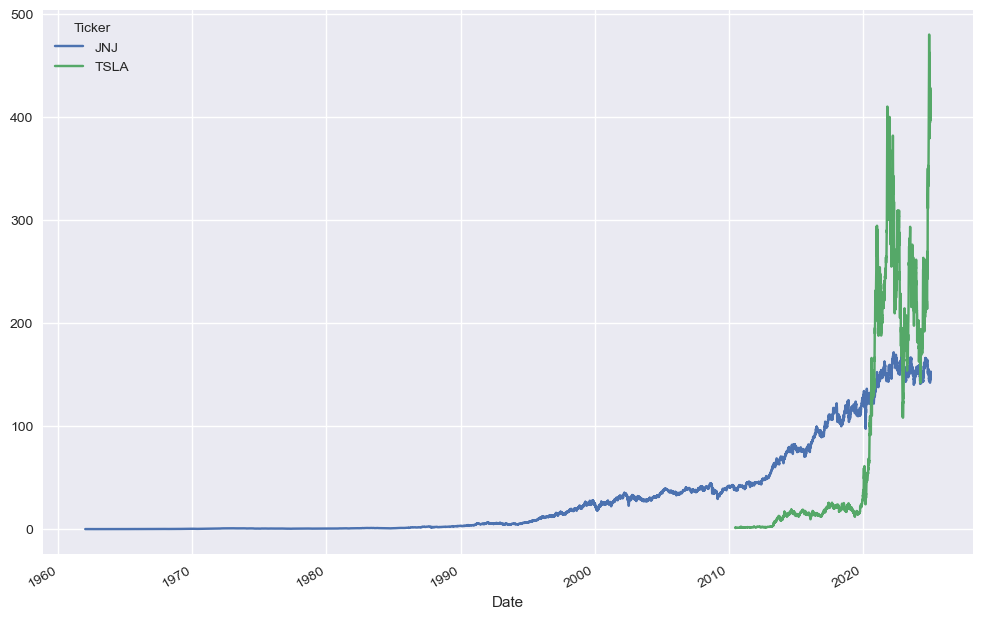

In [106]:
df.Close.plot(figsize = (12, 8))
plt.show()

In [107]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns")
df

Ticker             JNJ                                                \
Price            Close Dividends        High         Low        Open   
Date                                                                   
1962-01-02    0.062519       0.0    0.062519    0.062195    0.000000   
1962-01-03    0.061547       0.0    0.061871    0.061547    0.000000   
1962-01-04    0.060899       0.0    0.061871    0.060899    0.000000   
1962-01-05    0.059927       0.0    0.060413    0.059927    0.000000   
1962-01-08    0.058956       0.0    0.059441    0.058956    0.000000   
...                ...       ...         ...         ...         ...   
2025-01-22  145.270004       0.0  145.470001  142.110001  144.000000   
2025-01-23  146.639999       0.0  147.910004  144.809998  145.440002   
2025-01-24  146.820007       0.0  147.630005  146.380005  146.809998   
2025-01-27  152.889999       0.0  153.449997  148.000000  148.449997   
2025-01-28  150.380005       0.0  152.970001  150.300003  152.660004   

Ticker                                   TSLA                        \
Price      Stock Splits    Volume       Close Dividends        High   
Date                                                                  
1962-01-02          0.0         0         NaN       NaN         NaN   
1962-01-03          0.0    345600         NaN       NaN         NaN   
1962-01-04          0.0    216000         NaN       NaN         NaN   
1962-01-05          0.0    129600         NaN       NaN         NaN   
1962-01-08          0.0    172800         NaN       NaN         NaN   
...                 ...       ...         ...       ...         ...   
2025-01-22          0.0  16834700  415.109985       0.0  428.000000   
2025-01-23          0.0  10506400  412.380005       0.0  420.730011   
2025-01-24          0.0   9887300  406.579987       0.0  418.880005   
2025-01-27          0.0  15152300  397.149994       0.0  406.690002   
2025-01-28          0.0  10312800  398.089996       0.0  400.589996   

Ticker                                                       
Price              Low        Open Stock Splits      Volume  
Date                                                         
1962-01-02         NaN         NaN          NaN         NaN  
1962-01-03         NaN         NaN          NaN         NaN  
1962-01-04         NaN         NaN          NaN         NaN  
1962-01-05         NaN         NaN          NaN         NaN  
1962-01-08         NaN         NaN          NaN         NaN  
...                ...         ...          ...         ...  
2025-01-22  414.589996  416.809998          0.0  60963300.0  
2025-01-23  408.950012  416.059998          0.0  50690600.0  
2025-01-24  405.779999  414.450012          0.0  56427100.0  
2025-01-27  389.000000  394.799988          0.0  58125500.0  
2025-01-28  386.500000  396.910004          0.0  48732200.0  

[15875 rows x 14 columns]

In [108]:
jnj = df.JNJ
jnj

Price,Close,Dividends,High,Low,Open,Stock Splits,Volume
Date,,,,,,,
1962-01-02,0.062519,0.0,0.062519,0.062195,0.000000,0.0,0
1962-01-03,0.061547,0.0,0.061871,0.061547,0.000000,0.0,345600
1962-01-04,0.060899,0.0,0.061871,0.060899,0.000000,0.0,216000
1962-01-05,0.059927,0.0,0.060413,0.059927,0.000000,0.0,129600
1962-01-08,0.058956,0.0,0.059441,0.058956,0.000000,0.0,172800
...,...,...,...,...,...,...,...
2025-01-22,145.270004,0.0,145.470001,142.110001,144.000000,0.0,16834700
2025-01-23,146.639999,0.0,147.910004,144.809998,145.440002,0.0,10506400
2025-01-24,146.820007,0.0,147.630005,146.380005,146.809998,0.0,9887300


In [109]:
jnj[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

KeyError: "['Adj Close'] not in index"

__Dividends__

In [ ]:
jnj.Dividends.sum()

__Price Increase__

In [ ]:
jnj.Close.iloc[-1] - jnj.Close.iloc[0] # from Pandas v. 2.0 use iloc!

__Dividend Policy__

In [ ]:
jnj.loc[jnj.Dividends != 0].Dividends.plot()
plt.show()

In [ ]:
tsla = df.TSLA.dropna()
tsla

In [ ]:
tsla[["Close", "Adj Close"]].plot(figsize = (12, 8))
plt.show()

__Dividends__

In [ ]:
tsla.Dividends.sum()

__Price Increase__

In [ ]:
tsla.Close.iloc[-1] - tsla.Close.iloc[0]

__Dividend Policy__

In [ ]:
tsla.loc[tsla.Dividends != 0].Dividends.plot()
plt.show()

__-> JNJ is the high-dividend stock__